
## Yicheng May 2023

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive"

ModuleNotFoundError: No module named 'google'

In [1]:
import h5py
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.fft import fft, fftfreq
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
from pylab import plot, xlabel, ylabel
from scipy import arange
from scipy import signal
from scipy import linalg
import time
import warnings
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
import pandas as pd
#import ipywidgets as widgets
#from ipywidgets import *
warnings.filterwarnings('ignore')

Import libraries, define filenames and folder paths:

In [2]:
def load_data(file_path,n):
    # Open the file
    f = h5py.File(file_path, 'r')
    # List all the attributes for the file
    attrs = list(f.attrs.keys())
    # List of the stations
    stations = list(f.keys())
    dset = f[stations[n]]
    # List of attributes for the station
    station_attr = list(dset.attrs.keys())
    length = dset.shape[1]/(100*60*60*24)
    # Access the distance in meters of the station from the event
    meters = [dset.attrs['dist_m'],
    dset.attrs['ele'],
    dset.attrs['lat'],
    dset.attrs['lon']]
    return attrs, stations, station_attr, meters, length

def distance_epicenter(file_path):
    f = h5py.File(file_path, 'r')
    distance_list={}
    for k in f.keys():
        distance_list[k] = f[k].attrs['dist_m']
    return distance_list

def extract_data(x,y,file_path):
    # Extract a portion of the data from numerous stations
    f = h5py.File(file_path, 'r')
    # List of stations to consider
    stations_list = list(f.keys())

    # Start and end index values for the portion of data to extract
    # x*3600*100 is x hours of data at 100 Hzone day of data.
    # this example outputs (y-x) hour of second day:
    start = x*3600*100
    end = y*3600*100

    # Number of channels
    num_channels = 3
    # Create 4 empty lists to store the extracted data
    data = [[] for _ in range(len(stations_list))]
    # Extract the data from the different stations
    for i in range(len(stations_list)):
        data[i] = f[stations_list[i]][0:num_channels,start:end]
    # Slice the data to every station at the first channel
    for i in range(len(stations_list)):
        data[i] = data[i][0]
    return data


In [3]:
distance_epicenter("ev0001903830.h5")

{'CHKH': '0132049',
 'FGTH': '0112464',
 'FKSH': '0134673',
 'FSWH': '0050250',
 'HMNH': '0122418',
 'HMSH': '0109445',
 'HNRH': '0111594',
 'ICEH': '0077849',
 'IW2H': '0089564',
 'IWNH': '0079052',
 'IWZH': '0148113',
 'KAKH': '0025472',
 'KANH': '0130603',
 'KASH': '0110544',
 'KGSH': '0097082',
 'KKWH': '0050261',
 'KMAH': '0127065',
 'KMIH': '0091083',
 'KMYH': '0124031',
 'KWSH': '0092043',
 'MGMH': '0097370',
 'MKJH': '0136331',
 'MRUH': '0144786',
 'MSRH': '0031532',
 'NKEH': '0131269',
 'NKWH': '0143150',
 'NMEH': '0122165',
 'NRKH': '0095405',
 'NSEH': '0149575',
 'NYOH': '0135020',
 'OGCH': '0113710',
 'OMRH': '0145850',
 'ONDH': '0074910',
 'RIFH': '0060441',
 'RZTH': '0063016',
 'SISH': '0103181',
 'SMTH': '0081767',
 'SZKH': '0143210',
 'TAJH': '0050414',
 'TCKH': '0142622',
 'TDOH': '0109301',
 'THTH': '0138314',
 'TOUH': '0100214',
 'TOWH': '0044033',
 'TROH': '0143673',
 'TZWH': '0130083',
 'YGTH': '0121742',
 'YHBH': '0135469',
 'YMDH': '0114719',
 'YMMH': '0086993',


In [4]:
print(load_data("ev0001903830.h5",0))
stations_list = load_data("ev0001903830.h5",0)[1]

(['ele', 'lat', 'lon', 'mag', 'time'], ['CHKH', 'FGTH', 'FKSH', 'FSWH', 'HMNH', 'HMSH', 'HNRH', 'ICEH', 'IW2H', 'IWNH', 'IWZH', 'KAKH', 'KANH', 'KASH', 'KGSH', 'KKWH', 'KMAH', 'KMIH', 'KMYH', 'KWSH', 'MGMH', 'MKJH', 'MRUH', 'MSRH', 'NKEH', 'NKWH', 'NMEH', 'NRKH', 'NSEH', 'NYOH', 'OGCH', 'OMRH', 'ONDH', 'RIFH', 'RZTH', 'SISH', 'SMTH', 'SZKH', 'TAJH', 'TCKH', 'TDOH', 'THTH', 'TOUH', 'TOWH', 'TROH', 'TZWH', 'YGTH', 'YHBH', 'YMDH', 'YMMH', 'YUZH', 'YWTH'], ['dist_m', 'ele', 'lat', 'lon'], ['0132049', '74', '39.0718', '140.3185'], 31.25)


In [5]:
data = extract_data(650,722,"ev0001903830.h5")

In [6]:
data

[array([-176.93716, -176.01898, -175.03568, ..., -148.49397, -147.84645,
        -147.26782], dtype=float32),
 array([-180960.5  , -181931.25 , -182895.2  , ...,   47035.42 ,
          46985.285,   46931.15 ], dtype=float32),
 array([ 140.6941  ,  141.0521  ,  140.9915  , ...,  -95.927   ,
        -101.165985, -106.39313 ], dtype=float32),
 array([-60.71882  , -61.485474 , -62.204872 , ...,   4.0787573,
          4.1011486,   4.038732 ], dtype=float32),
 array([134.27248, 131.70084, 129.2115 , ...,  77.66682,  79.31998,
         80.90517], dtype=float32),
 array([390.8919  , 395.0661  , 398.9985  , ..., -91.604866, -95.001236,
        -98.784904], dtype=float32),
 array([-231.76279 , -232.46175 , -233.11728 , ...,   54.43177 ,
          55.570908,   56.546177], dtype=float32),
 array([839.6596  , 847.40247 , 855.146   , ...,  23.700918,  25.910257,
         27.984375], dtype=float32),
 array([-54.339066, -53.57321 , -52.71279 , ...,  89.36319 ,  88.99565 ,
         88.47395 ], dtype=fl

In [7]:
def taper(nt,t1,t2,alpha,cos,zeros,concat,x):
    wndo=[]; nts=t2-t1;r=alpha*float(nts);dat_w=[];
    for i in range(0,int(r/2)):
        ri=0.5*( 1+cos( 2*3.1416*(1/r)*(float(i)-r/2) ) )
        wndo.append(ri)
    for i in range(int(r/2)+1,nts-int(r/2)+1):
        wndo.append(1)
    for i in range(nts-int(r/2)+1,nts+1):
        ri=0.5*( 1+cos( 2*3.1416*(1/r)*(float(i)-nts+r/2) ) )
        wndo.append(ri)
    #wndo=tukey(t2-t1,alpha)
    padleft=zeros(t1);padright=zeros(nt-t2)
    wndo_a=concat((padleft,wndo,padright))
    for k in range(len(stations_list)):
        dat_ww=np.multiply(wndo_a, x[k])
        dat_w.append(dat_ww)
    return dat_w

In [8]:
fs = 100
sampling_frequency = 100  # Number of samples per second
t = np.arange(0, 1, 1/fs)
fq = 100.0 # frequency of input signal
dt = 1/fs  # time sampling of input signal
f_min = 1  # desired cutoff for high-pass filter
nt = len(data[0])

In [9]:
tt=dt*np.arange(nt);
To=nt*dt;
clip_w=0.1
# make taper and apply to signal:
dat_w=taper(nt,0,nt,clip_w,np.cos,np.zeros,np.concatenate,data)

In [10]:
dat_w

[array([-2.38731220e-09, -1.06620353e-09, -2.73109466e-10, ...,
        -2.31696250e-10, -8.95553457e-10, -1.98700069e-09]),
 array([-2.44159677e-06, -1.10201604e-06, -2.85372746e-07, ...,
         7.33897186e-08,  2.84604969e-07,  6.33215207e-07]),
 array([ 1.89830531e-09,  8.54397852e-10,  2.19990088e-10, ...,
        -1.49675615e-10, -6.12794878e-10, -1.43550176e-09]),
 array([-8.19244374e-10, -3.72437270e-10, -9.70587247e-11, ...,
         6.36411533e-12,  2.48419748e-11,  5.44923071e-11]),
 array([1.81166190e-09, 7.97754282e-10, 2.01609668e-10, ...,
        1.21184112e-10, 4.80466586e-10, 1.09160725e-09]),
 array([ 5.27408145e-09,  2.39304231e-09,  6.22560335e-10, ...,
        -1.42931754e-10, -5.75453011e-10, -1.33284835e-09]),
 array([-3.12704304e-09, -1.40809549e-09, -3.63734625e-10, ...,
         8.49302961e-11,  3.36610843e-10,  7.62945300e-10]),
 array([1.13290480e-08, 5.13298902e-09, 1.33429066e-09, ...,
        3.69807190e-11, 1.56946754e-10, 3.77577204e-10]),
 array([-7.3

In [11]:
y=kkk

NameError: name 'kkk' is not defined

In [ ]:
%matplotlib inline
#plt.xlim([34500,35000])
for k in range(len(stations_list)):
    plt.plot(tt, dat_w[k], label='Tapered Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def filter(order, cutoff_freq, sampling_freq,x):
    # Compute the digital Butterworth filter coefficients
    b, a = signal.butter(order, cutoff_freq / (sampling_freq / 2), btype='high', analog=False)

    # Apply the forward and backward filter to the input signal
    filtered_signal = signal.filtfilt(b, a, x)
    return filtered_signal

# Define the filter parameters
# order # Filter order
# cutoff_freq  # Cutoff frequency (in Hz)
# sampling_freq  # Sampling frequency (in Hz)
# x is the data

filtered_signal = filter(4, 1, 100, dat_w)


In [ ]:
y=kkkk

In [ ]:
%matplotlib inline
plt.figure()
for k in range(len(stations_list)):
    plt.plot(tt, filtered_signal[k], label='filtered Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    #plt.xlim([0,200])
    plt.legend()
    plt.grid(True)
    plt.show()

1. If the timeframe is 24 hours what should I use in X-axis standing for time
2. how do I deal with the extra large amplitude
3. how to plot the 24-hour signal
4. how deal with different stations
5. plot the label in barchart and plot the amplitude plot

In [13]:
# Use 5 seconds time window as cutoff for the four stations and first channel
def datacutoff(x):
    datafiltered = list()
    for k in range(len(stations_list)):
        for i in range(int(len(x[k])/100/5)):#360000/100/5
            datafiltered.append(filtered_signal[k][500*i:500*(i+1)])
    return datafiltered

In [14]:
datafiltered = datacutoff(data)
len(datafiltered)

2695680

In [ ]:
%matplotlib notebook
fig,ax=plt.subplots(3)
ax[0].plot(datafiltered[864],'k-')
ax[1].plot(datafiltered[1],'k-')
ax[2].plot(datafiltered[2],'k-')

Use obspy library to apply 1HZ high-pass filter

Featrue Extraction

For each waveform, feature vectors are calculated to use in clustering analysis. The data features are time and frequency domain scalar values that include the integral of the squared waveform, maximum spectral amplitude, frequency at the maximum spectral amplitude, center frequency, signal bandwidth, zero upcrossing rate, and the rate of spectral peaks

First using fourier transform to get the frequency domain values

In [15]:
fs=100#HZ sampling freq
t= np.arange(0,5,1/fs) #time interval
f = 100;# signal freq???????????????????????????????????????
# generate frequency axis
n=np.size(t)# number of samples
fi = np.linspace(0,int(fs/2),int(n/2))#freq interval


 # Calculate the Fourier transform of the waveform
def myfourier(x):
    datafft = list()#spectral_amplitudes
    for i in range(len(x)):
        datafft.append(fft(x[i])[0: int(n/2)])# #spectral_amplitudes
    return datafft

In [16]:
datafft = myfourier(datafiltered)
len(datafft)

2695680

In [ ]:
%matplotlib notebook
fig,ax=plt.subplots(2)
ax[0].plot(fi,np.abs(datafft[10])/len(datafft[10]));
ax[1].plot(datafiltered[10]);

Get the intergral of squared waveform

In [17]:
def iosw(x):
    integral = list()
    for i in range(len(x)):
        # Get the waveform data
        data0 = datafiltered[i]

        # Square the waveform data
        data_squared = data0 ** 2

        # Calculate the integral of the squared data
        integral.append(np.sum(data_squared))
    return integral
integral = iosw(datafiltered)

Max spectral amplitude:

Frequency of max spectral amplitude:

In [18]:
#Assuming Fx is a list or array containing the spectral amplitudes and fi is a corresponding list or array containing the frequencies,
#this code finds the index of the maximum amplitude and retrieves the corresponding frequency.
def freq(x):
    max_indices = []
    max_amplitudes = []
    for array in x:
        max_index = np.argmax(array)
        max_indices.append(max_index)
        max_amplitudes.append(array[max_index].real)

    # Retrieve the corresponding frequencies
    frequencies = [fi[index] for index in max_indices]
    return frequencies, max_amplitudes
frequencies, max_amplitudes = freq(datafft)


Center frequency:

In [19]:
#Assuming fi and Fxi are lists or arrays representing frequencies and corresponding
#spectral amplitudes, respectively, this code calculates the center frequency
#using the given equation.
def cenfreq(x,y):
    center_frequency = list()
    for i in range(len(x)):
        numerator = np.sum(fi*y[i]).real
        denominator = np.sum(y[i]).real
        center_frequency.append(numerator / denominator)
    return frequencies
center_frequency = cenfreq(datafiltered,datafft)

Signal bandwidth:

In [20]:
# Assuming fi and Fxi are lists or arrays representing frequencies and corresponding spectral amplitudes,
# and fcenter is the center frequency, this code calculates the signal bandwidth using the given equation.
def signalb(x,y,z):
    signal_bandwidth = list()
    for i in range(len(x)):
        numerator = np.sum((fi - y[i])**2)
        denominator = np.sum(z[i])
        signal_bandwidth.append(np.sqrt(numerator / denominator).real)
    return signal_bandwidth
signal_bandwidth = signalb(datafiltered,center_frequency,datafft)

Zero up-crossing rate:

In [21]:
# Assuming fi and Fxi are lists or arrays representing frequencies and corresponding
# spectral amplitudes, this code calculates the zero up-crossing rate using the given equation.
def zur(x,y):
    zero_upcrossing_rate = list()
    for i in range(len(x)):
        omega = 2 * np.pi * fi
        numerator = np.sum(omega**2 * y[i]**2)
        denominator = np.sum(y[i]**2)
        zero_upcrossing_rate.append(np.sqrt(numerator / denominator).real)
    return zero_upcrossing_rate
zero_upcrossing_rate = zur(datafiltered,datafft)

Rate of spectral peaks:

In [22]:
len(datafft)

2695680

In [23]:
#Assuming fi and Fxi are lists or arrays representing frequencies and corresponding
#spectral amplitudes, this code calculates the rate of spectral peaks using the given equation.
def rosp(x,y):
    rate_of_spectral_peaks = list()
    for i in range(len(x)):
        omega = 2 * np.pi * fi
        numerator = np.sum(omega**4 * y[i]**2)
        denominator = np.sum(omega**2 * y[i]**2)
        rate_of_spectral_peaks.append(np.sqrt(numerator / denominator).real)
    return rate_of_spectral_peaks
rate_of_spectral_peaks = rosp(datafiltered,datafft)

PCA

In [24]:
def creatdf():
    df = pd.DataFrame(list(zip(integral, max_amplitudes, frequencies, center_frequency, signal_bandwidth,zero_upcrossing_rate,rate_of_spectral_peaks)),
                  columns = ['integral of the squared waveform', 'maximum spectral amplitude', 'frequency at the maximum spectral amplitude',
                             'center frequency', 'signal bandwidth', 'zero upcrossing rate', 'rate of spectral peaks'])
    return df
df = creatdf()
df

,integral of the squared waveform,maximum spectral amplitude,frequency at the maximum spectral amplitude,center frequency,signal bandwidth,zero upcrossing rate,rate of spectral peaks
0,3.225073e-11,0.000015,1.606426,1.606426,19353.392700,23.607682,215.897029
1,1.272551e-10,0.000042,1.405622,1.405622,12343.977400,3.751600,247.712562
2,2.730564e-09,0.000206,1.204819,1.204819,10690.948326,5.557431,42.360368
3,4.283332e-09,0.000111,0.401606,0.401606,6162.299971,21.859111,224.783965
4,2.263844e-08,0.000426,0.602410,0.602410,1544.679235,6.177249,66.660546
...,...,...,...,...,...,...,...
2695675,9.527553e-07,0.002275,0.803213,0.803213,1313.333601,1.144112,96.858514
2695676,3.711150e-07,0.002291,1.004016,1.004016,1638.265205,9.082833,57.383303
2695677,1.243198e-07,0.001081,1.606426,1.606426,2127.213169,4.078750,178.078486
2695678,2.060500e-08,0.000235,1.405622,1.405622,3224.919093,11.830783,93.138360


In [25]:
# Assuming DataFrame is named 'df'
X = df

# Splitting the dataset into training and test sets
X_train, X_test = train_test_split(X, test_size=0.1, random_state=66)

In [26]:
# Reset the index of the test data
test_data = X_test.reset_index()

# Get the position of the test data
indy = test_data['index'].tolist()

indy = sorted(indy)

indy = np.hstack(indy)

# Display the position of the test data
print("Position of test data:", indy)


Position of test data: [      3       7       9 ... 2695641 2695645 2695666]


In [27]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

<IPython.core.display.Javascript object>


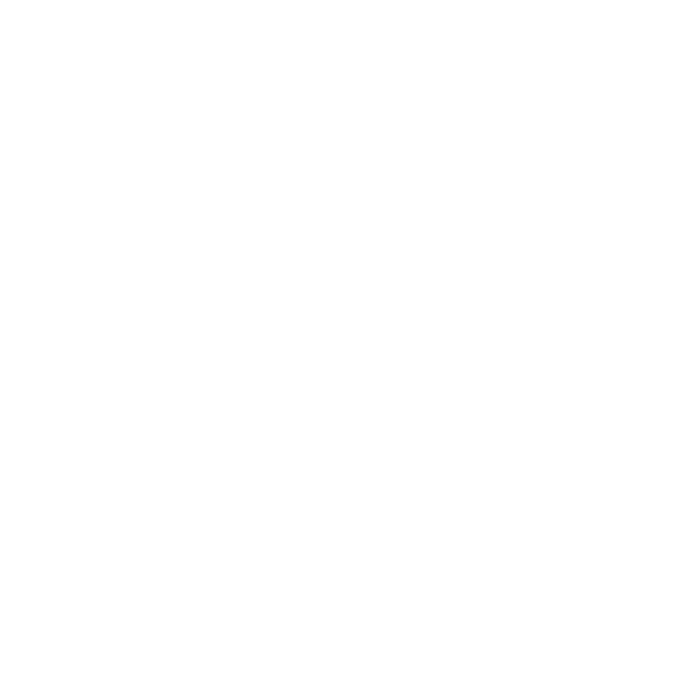

<Axes: >

In [28]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),color = "k", annot=True)

In [29]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Checking the explained variance ratio
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()
pca.explained_variance_ratio_

array([3.02965417e-01, 2.59632737e-01, 1.43131023e-01, 1.41452287e-01,
       1.26737577e-01, 2.60809595e-02, 1.49567454e-32])

Whitening
We have used PCA to reduce the dimension of the data. There is a closely related preprocessing step called whitening (or, in some other literatures, sphering) which is needed for some algorithms. If we are training on images, the raw input is redundant, since adjacent pixel values are highly correlated. The goal of whitening is to make the input less redundant; more formally, our desiderata are that our learning algorithms sees a training input where (i) the features are less correlated with each other, and (ii) the features all have the same variance.
Whitening combined with dimensionality reduction. If you want to have data that is whitened and which is lower dimensional than the original input, you can also optionally keep only the top k
 components of xPCAwhite
. When we combine PCA whitening with regularization (described later), the last few components of xPCAwhite
 will be nearly zero anyway, and thus can safely be dropped.
 http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

 https://learndataa.com/2020/09/15/data-preprocessing-whitening-or-sphering-in-python/

In [30]:
def data_Whitening(x):
    # Zero center data
    xc = x - np.mean(x, axis=0)
    print(xc.shape)
    xc = xc.T
    print('xc.shape:', xc.shape, '\n')

    # Calculate Covariance matrix
    # Note: 'rowvar=True' because each row is considered as a feature
    # Note: 'bias=True' to divide the sum of squared variances by 'n' instead of 'n-1'
    xcov = np.cov(xc, rowvar=True, bias=True)
    print

    # Calculate Eigenvalues and Eigenvectors
    w, v = linalg.eig(xcov) # .eigh()
    # Note: Use w.real.round(4) to (1) remove 'j' notation to real, (2) round to '4' significant digits
    print("Eigenvalues:\n", w.real.round(4), '\n')
    print("Eigenvectors:\n", v, '\n')

    # Calculate inverse square root of Eigenvalues
    # Optional: Add '.1e5' to avoid division errors if needed
    # Create a diagonal matrix
    diagw = np.diag(1/(w**0.5)) # or np.diag(1/((w+.1e-5)**0.5))
    diagw = diagw.real.round(4) #convert to real and round off
    print("Diagonal matrix for inverse square root of Eigenvalues:\n", diagw, '\n')

    # Calculate Rotation (optional)
    # Note: To see how data can be rotated
    xrot = np.dot(v, xc)

    # Whitening transform using PCA (Principal Component Analysis)
    wpca = np.dot(np.dot(diagw, v.T), xc)
    wpca = wpca[:-1].T
    return wpca
wpca = data_Whitening(X_train_pca)
wpca_test = data_Whitening(X_test_pca)
wpca

(2426112, 7)
xc.shape: (7, 2426112) 

Eigenvalues:
 [2.1208 1.8174 0.1826 0.8872 0.9902 1.0019 0.    ] 

Eigenvectors:
 [[ 1.00000000e+00  5.44206494e-16 -1.92469363e-17  7.27004012e-17
  -9.01175108e-17 -3.65155212e-17 -2.62893586e-31]
 [ 0.00000000e+00  1.00000000e+00  6.30017416e-17 -2.42755452e-16
   2.88108984e-16  2.22339102e-16 -3.47536906e-28]
 [ 0.00000000e+00 -1.80881841e-16 -7.71593136e-17  3.03609342e-15
  -1.77500154e-14  1.00000000e+00 -1.69085878e-27]
 [ 0.00000000e+00  3.16564804e-16  3.68198388e-18 -6.45100921e-16
  -1.00000000e+00 -1.33059871e-14 -7.05757022e-29]
 [ 0.00000000e+00 -3.86720608e-16 -8.08294289e-17 -1.00000000e+00
   8.01171119e-16  1.82483666e-15 -3.45844880e-28]
 [ 0.00000000e+00 -1.14051575e-17 -1.00000000e+00  1.02862353e-15
   4.31838531e-17 -1.78046331e-16  1.50424477e-28]
 [ 0.00000000e+00 -2.13347744e-32 -3.41285189e-28 -1.69506595e-28
  -1.01036558e-27  2.18464905e-27  1.00000000e+00]] 

Diagonal matrix for inverse square root of Eigenvalues:
 [

array([[-0.21572458, -0.03534605, -0.04309009,  0.5763931 ,  0.7839782 ,
         0.28160112],
       [-0.45881123, -0.03512783, -0.05300127, -0.60838939,  1.07122829,
         0.46490649],
       [-0.63991193, -0.04369309, -0.04422268,  0.06799624,  0.48519521,
         0.15847823],
       ...,
       [-0.78629567, -0.05646185, -0.02611081,  0.30486164, -0.94595023,
        -0.42105641],
       [ 0.56969894, -0.02390956,  0.01108287,  1.16814594, -0.7608726 ,
        -0.43279467],
       [-0.49156654, -0.05417276, -0.0372554 ,  0.1273583 , -0.87384081,
        -0.40644837]])

how to separete the clusters/is there any noises in it  /found some precuser/ introduce the method relevant for earthquke forcast potential/ area in twon and noise is natural earthquake and sounds
why chooose bca this seems work explore this method bca potential,nonetropic

In [ ]:
y = kkkk

KMean

In [ ]:
# Elbow Method for optimal number of clusters
Sum_of_squared_distances = []
K = range(2,21)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(wpca)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Silhouette Method for optimal number of clusters

silhouette_avg = []
for num_clusters in K:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(wpca)
  cluster_labels = kmeans.labels_
  # silhouette score
  silhouette_avg.append(silhouette_score(wpca, cluster_labels))
plt.plot(K,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
!pip install git+https://github.com/milesgranger/gap_statistic.git

Gap Statistic

In [ ]:
from gap_statistic import OptimalK

def KMeans_clustering_func(X, k):
    """
    K Means Clustering function, which uses the K Means model from sklearn.

    These user-defined functions *must* take the X (input features) and a k
    when initializing OptimalK
    """

    # Include any clustering Algorithm that can return cluster centers

    m = KMeans(random_state=12, n_clusters=k, init="k-means++")
    m.fit(X)

    # Return the location of each cluster center,
    # and the labels for each point.
    return m.cluster_centers_, m.predict(X)
#--------------------create a wrapper around OptimalK to extract cluster centers and cluster labels
optimalK = OptimalK(clusterer=KMeans_clustering_func)
#--------------------Run optimal K on the input data (subset_scaled_interim) and number of clusters
n_clusters = optimalK(wpca, cluster_array=np.arange(2, 21))
#--------------------Gap Statistics data frame
optimalK.gap_df

The gap statistic is the difference in the dispersion of the clusters from the data features and null features. Clusters are formed using 2–20 centroids, and the method is reinitialized for 100 iterations using different randomly chosen centroid seeds, with the final model having the lowest dispersion from the cluster centers. For each of the 2–20 number of centroids, 19 total, the process is repeated 500 times using a population of 15,000 ran- domly selected data features to assess the total inertia mean and deviation for each number of clusters.

In [ ]:
def gaps():
    gap = []
    gap_avg = []
    for k in range(2, 21):
        for i in range(5):
            #--------------------create a wrapper around OptimalK to extract cluster centers and cluster labels
            optimalK = OptimalK(clusterer=KMeans_clustering_func)
            #--------------------Run optimal K on the input data (subset_scaled_interim) and number of clusters
            n_clusters = optimalK(wpca, cluster_array=np.arange(k, k+1))
            #--------------------Gap Statistics data frame
            optimalK.gap_df[['n_clusters', 'gap_value']]
            gap.append(optimalK.gap_df['gap_value'])
    chunk_size = 5
    for i in range(0, len(gap), chunk_size):
        mean_value = np.mean(gap[i:i+chunk_size])
        gap_avg.append(mean_value)
    # Calculate the differences between consecutive gap values
    gap_differences = np.diff(gap_avg)
    data_points = gap_avg
    rate_of_change = np.divide(gap_differences, gap_avg[:-1])
    return gap_avg, data_points, rate_of_change
gap_avg, data_points, rate_of_change = gaps()

In [ ]:
# The gap statistic
# (solid blue line) showing the difference in centroid dispersion. The rate of change shown
# as the dashed black line.

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(range(len(data_points)), data_points, 'bo-', label='Data Points')
plt.xticks(range(1, 20))

ax2.plot(range(2,20), rate_of_change, 'k--', label='Rate of Change')

ax1.set_xlabel('Index')
ax1.set_ylabel('Gap')
ax2.set_ylabel('$\Delta Gap$')
plt.title('Data Points and Rate of Change')
ax1.legend()
ax2.legend()

ax2.tick_params(axis='y', labelcolor='k')

In [ ]:
wpca_test.shape

In [31]:
# Set the number of clusters
num_clusters = 5

# Set the number of data points in each batch for centroid initialization
batch_size = 15000

# Set the maximum number of iterations without improvement
max_iterations = 100
NUM_ATTEMPTS = 500 # we will attempt this with 500 random initial centroids (NUM_ATTEMPTS, or m)

def bcentriods(data,num_clusters,batch_size,max_iterations,NUM_ATTEMPTS):
    final_cents = []
    final_inert = []

    for sample in range(NUM_ATTEMPTS):
        #print('\nCentroid attempt: ', sample) # Select batches of 50 randomly chosen data points
        random_indices = np.random.choice(len(data), size=batch_size)
        data_sample = data[random_indices]
        km = KMeans(n_clusters=num_clusters, init='random', max_iter=1, n_init=1)#, verbose=1)
        km.fit(data_sample)
        inertia_start = km.inertia_
        intertia_end = 0
        cents = km.cluster_centers_

        for iter in range(max_iterations):
            km = KMeans(n_clusters=num_clusters, init=cents, max_iter=1, n_init=1)
            km.fit(data_sample)
            #print('Iteration: ', iter)
            #print('Inertia:', km.inertia_)
            #print('Centroids:', km.cluster_centers_)
            inertia_end = km.inertia_
            cents = km.cluster_centers_
        final_cents.append(cents)
        final_inert.append(inertia_end)
        #print('Difference between initial and final inertia: ', inertia_start-inertia_end)
        # Get best centroids to use for full clustering
        best_cents = final_cents[final_inert.index(min(final_inert))]
    return best_cents
best_cents = bcentriods(wpca,5,15000,100,500)

In [32]:
# Get best centroids to use for full clustering

km_full = KMeans(n_clusters=num_clusters, init=best_cents, max_iter=100, verbose=1, n_init=1)
km_full.fit(wpca_test)
# Assuming you have your evaluation data stored in 'evaluation_data' variable
evaluation_data = wpca_test
# Get the labels assigned to each data point using the best model
labels = km_full.predict(evaluation_data)

# Count the number of data points in each cluster
cluster_counts = [0] * num_clusters
for label in labels:
    cluster_counts[label] += 1

# Calculate the percentage of data points in each cluster
total_points = len(evaluation_data)
cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

# Print the cluster labels and their percentages
for i in range(num_clusters):
    print("Label {}: {:.2f}%".format(i+1, cluster_percentages[i]))



Initialization complete
Iteration 0, inertia 1490077.3765540295.
Iteration 1, inertia 1266777.2833526186.
Iteration 2, inertia 1096039.8923672345.
Iteration 3, inertia 1041516.5420834837.
Iteration 4, inertia 1023657.6492600006.
Iteration 5, inertia 1015667.1561244676.
Iteration 6, inertia 1012483.7994249681.
Iteration 7, inertia 1010884.1394313695.
Iteration 8, inertia 1009577.536898627.
Iteration 9, inertia 1008890.1612622035.
Iteration 10, inertia 1008469.2193648283.
Iteration 11, inertia 1008261.3548487737.
Iteration 12, inertia 1008208.1149102082.
Iteration 13, inertia 1008171.6697715735.
Iteration 14, inertia 1008148.2407917862.
Iteration 15, inertia 1008137.2086424214.
Iteration 16, inertia 1008130.7610015605.
Converged at iteration 16: center shift 6.864847393484254e-05 within tolerance 9.999670571709812e-05.
Label 1: 0.03%
Label 2: 8.11%
Label 3: 9.31%
Label 4: 40.29%
Label 5: 42.26%


https://towardsdatascience.com/iterative-initial-centroid-search-via-sampling-for-k-means-clustering-2b505119ae37

https://www.askpython.com/python/examples/plot-k-means-clusters-python

In [33]:
def labelcount(x):
    count = []
    # Get the unique labels
    unique_labels = np.unique(x)
    # Iterate over the unique labels and access the data points for each label
    for label in unique_labels:
        data_points = np.where(labels == label)[0]
        print(f"Label {label}: {data_points}")
        count.append(len(data_points))
    return count, unique_labels
count,unique_labels = labelcount(labels)

Label 0: [  2141   3968   6770   6854  12921  15501  21785  22769  25364  28523
  31486  34188  37601  40092  48016  55490  56583  59942  63209  64243
  67113  73895  75762  82077  91942  92037  92543  93228 101626 104405
 104991 106709 109187 111970 113499 113977 116339 123069 130822 131787
 136093 140702 141991 148189 149892 150543 157224 169682 180203 180734
 180987 185105 195916 196112 198107 198549 202255 203578 204785 206038
 208057 209942 221367 221695 226799 229104 230094 230200 230738 230856
 231494 231820 234536 235188 237926 242323 242883 243631 250114 253278
 256532 256780 258948 260010 260463 261243 262994 264921]
Label 1: [    20     34     47 ... 269531 269532 269539]
Label 2: [     3     21     24 ... 269537 269545 269555]
Label 3: [     1      4      5 ... 269564 269565 269567]
Label 4: [     0      2      6 ... 269553 269562 269566]


In [34]:
labels=labels.astype(int)
labels

array([4, 3, 4, ..., 3, 4, 3])

In [ ]:
count

In [35]:
# Iterate over the unique labels and access the data points for each label
for label in unique_labels:
    data_points = evaluation_data[labels == label]
    print(f"Label {label}:")
    print(data_points)

Label 0:
[[ 2.84505013e-01  3.04858568e+01 -1.10276047e+00 -1.23825074e-01
  -8.34172941e-01 -1.09947122e+00]
 [ 4.68193508e-01  3.29245212e+01  2.13269729e+01 -1.54698476e-01
  -4.21048925e-01 -1.00204268e-01]
 [ 7.17701955e-01  5.82678460e+01 -2.55903879e+01 -3.44624304e-01
  -1.16226088e+00  1.33031174e+00]
 [ 7.28884677e-01  7.83442795e+01  1.17274970e+00 -4.64233675e-01
  -1.62909570e+00 -3.52273818e-01]
 [ 7.10018836e-01  2.17929040e+01  7.75491642e+00 -9.68920887e-02
  -5.06569582e-02  1.31511094e+00]
 [ 7.41484257e-01  4.17055012e+01  8.31015593e+01 -2.63242276e-01
  -6.83065346e-01  7.11674957e-02]
 [-1.49027530e+00  3.08909130e+01  8.82476857e+01 -2.85817492e-01
  -1.93025595e+00  8.99741351e-01]
 [-4.27969301e-01  2.26571373e+01  1.85772310e+01 -1.30902524e-01
  -7.95938461e-01  7.00820748e-01]
 [ 3.23830578e-01  2.74688942e+01 -5.23386706e+00 -1.34315381e-01
  -7.08809874e-01  4.88117152e-01]
 [-5.73297307e-01  3.03874885e+01  2.55355354e+01 -1.08221402e-01
   1.10410524e+0

In [36]:
nn=len(data)
nn

52

In [37]:
def time_interval(x):
    # Initialize an empty list for indy
    interval = []

    # Get the unique labels
    unique_labels = np.unique(x)

    # Iterate over the unique labels and access the data points for each label
    for label in unique_labels:
        # Find the indices where the label occurs in the 'labels' array
        indices = np.where(x == label)[0]
        # Append the indices corresponding to each label to the 'indy' list
        interval.append(indices)

    # Concatenate the elements in the 'indy' list to create the final 'indy' array
    indy = np.hstack(interval)*500
    return indy, interval
indy, interval = time_interval(labels)




interval = np.hstack(interval)
indy0=interval[:count[0]]
indy1=interval[(count[0]):(count[0]+count[1])]
indy2=interval[(count[0]+count[1]):(count[0]+count[1]+count[2])]
indy3=interval[(count[0]+count[1]+count[2]):(count[0]+count[1]+count[2]+count[3])]
indy4=interval[(count[0]+count[1]+count[2]+count[3]):(count[0]+count[1]+count[2]+count[3]+count[4])]

indy.shape

(269568,)

In [ ]:
efft=[]
evaluation_data[indy0]
for i in range(len(evaluation_data[indy0])):
    efft.append(fft(evaluation_data[indy0][i])[0: int(n/2)].real.tolist())
len(efft)

In [38]:
int_lab=labels.tolist()
int_lab0=int_lab[:count[0]]
indy


array([  1070500,   1984000,   3385000, ..., 134776500, 134781000,
       134783000])

In [ ]:
y=kkkk

The time interval should be a bigger time period like one day or one hour(10%) with 10 days or 10 hours data (90%)

In [ ]:

cols = ['royalblue','lightgreen','yellow','crimson','darkorange']
%matplotlib notebook
plt.figure(figsize=(7,7))
for v in range(len(stations_list)):
    for i in range(len(indy)-1):
        plot(np.arange(indy[i],indy[i+1]),data[v][indy[i]:indy[i+1]],cols[int_lab[i]])




We have like 10% data labels how do we applied to all the data?
2. indy stands for time interval how many should we have in my data I just label different data points and how do I know which time interval it belong to,
the key is how to define intervals (indy)

1. The 1 min interval starting at 18:09 shows all labels with a microseismic event occurring at 42 s with the P wave as Label 4 and the S wave as Label 2 (Figure 4c). Emergent waveforms are identiﬁed and assigned different labels (Figure 4d), implying that the feature vectors to describe each wavelet to data are adequately describing the key spectral properties of the waveforms.

2. what does this model do and its goal

In [ ]:
y=kkkkkk

(720, 7)
xc.shape: (7, 720) 

Eigenvalues:
 [2.056  1.8808 1.0844 0.9189 0.9691 0.0909 0.    ] 

Eigenvectors:
 [[ 1.00000000e+00  2.92937690e-15 -4.41846533e-16  3.90554004e-16
   1.99756549e-16 -1.34966872e-17  8.34667961e-32]
 [ 0.00000000e+00  1.00000000e+00 -8.28631452e-17  3.32620357e-16
   1.26973212e-16 -1.10865552e-17  1.06622199e-30]
 [ 0.00000000e+00  5.57963880e-16  1.00000000e+00  1.06126012e-15
   2.54763731e-16 -5.29426779e-17 -2.25905089e-30]
 [ 0.00000000e+00 -7.29079084e-18 -1.47569751e-15 -2.40960284e-15
  -1.00000000e+00 -5.63278048e-17  6.00723216e-30]
 [ 0.00000000e+00 -7.21791117e-17  1.88130761e-15  1.00000000e+00
  -4.92240808e-16  1.77637525e-16 -3.12772798e-31]
 [ 0.00000000e+00 -1.07669877e-18 -5.93384671e-17 -4.72030063e-17
   2.44471797e-16 -1.00000000e+00 -3.55300913e-29]
 [ 0.00000000e+00 -4.35111815e-32  9.79794795e-31 -6.33034934e-30
   1.39185189e-29 -4.99088933e-28  1.00000000e+00]] 

Diagonal matrix for inverse square root of Eigenvalues:
 [[6.97400

<IPython.core.display.Javascript object>


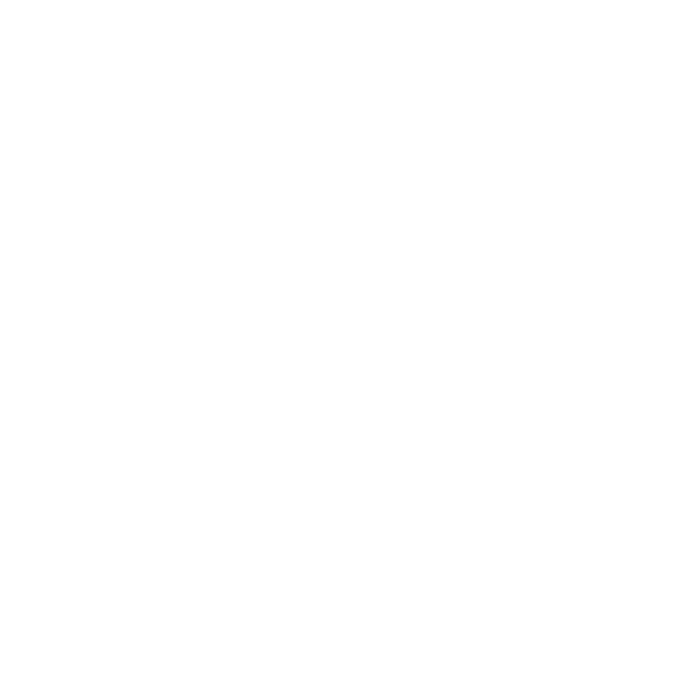

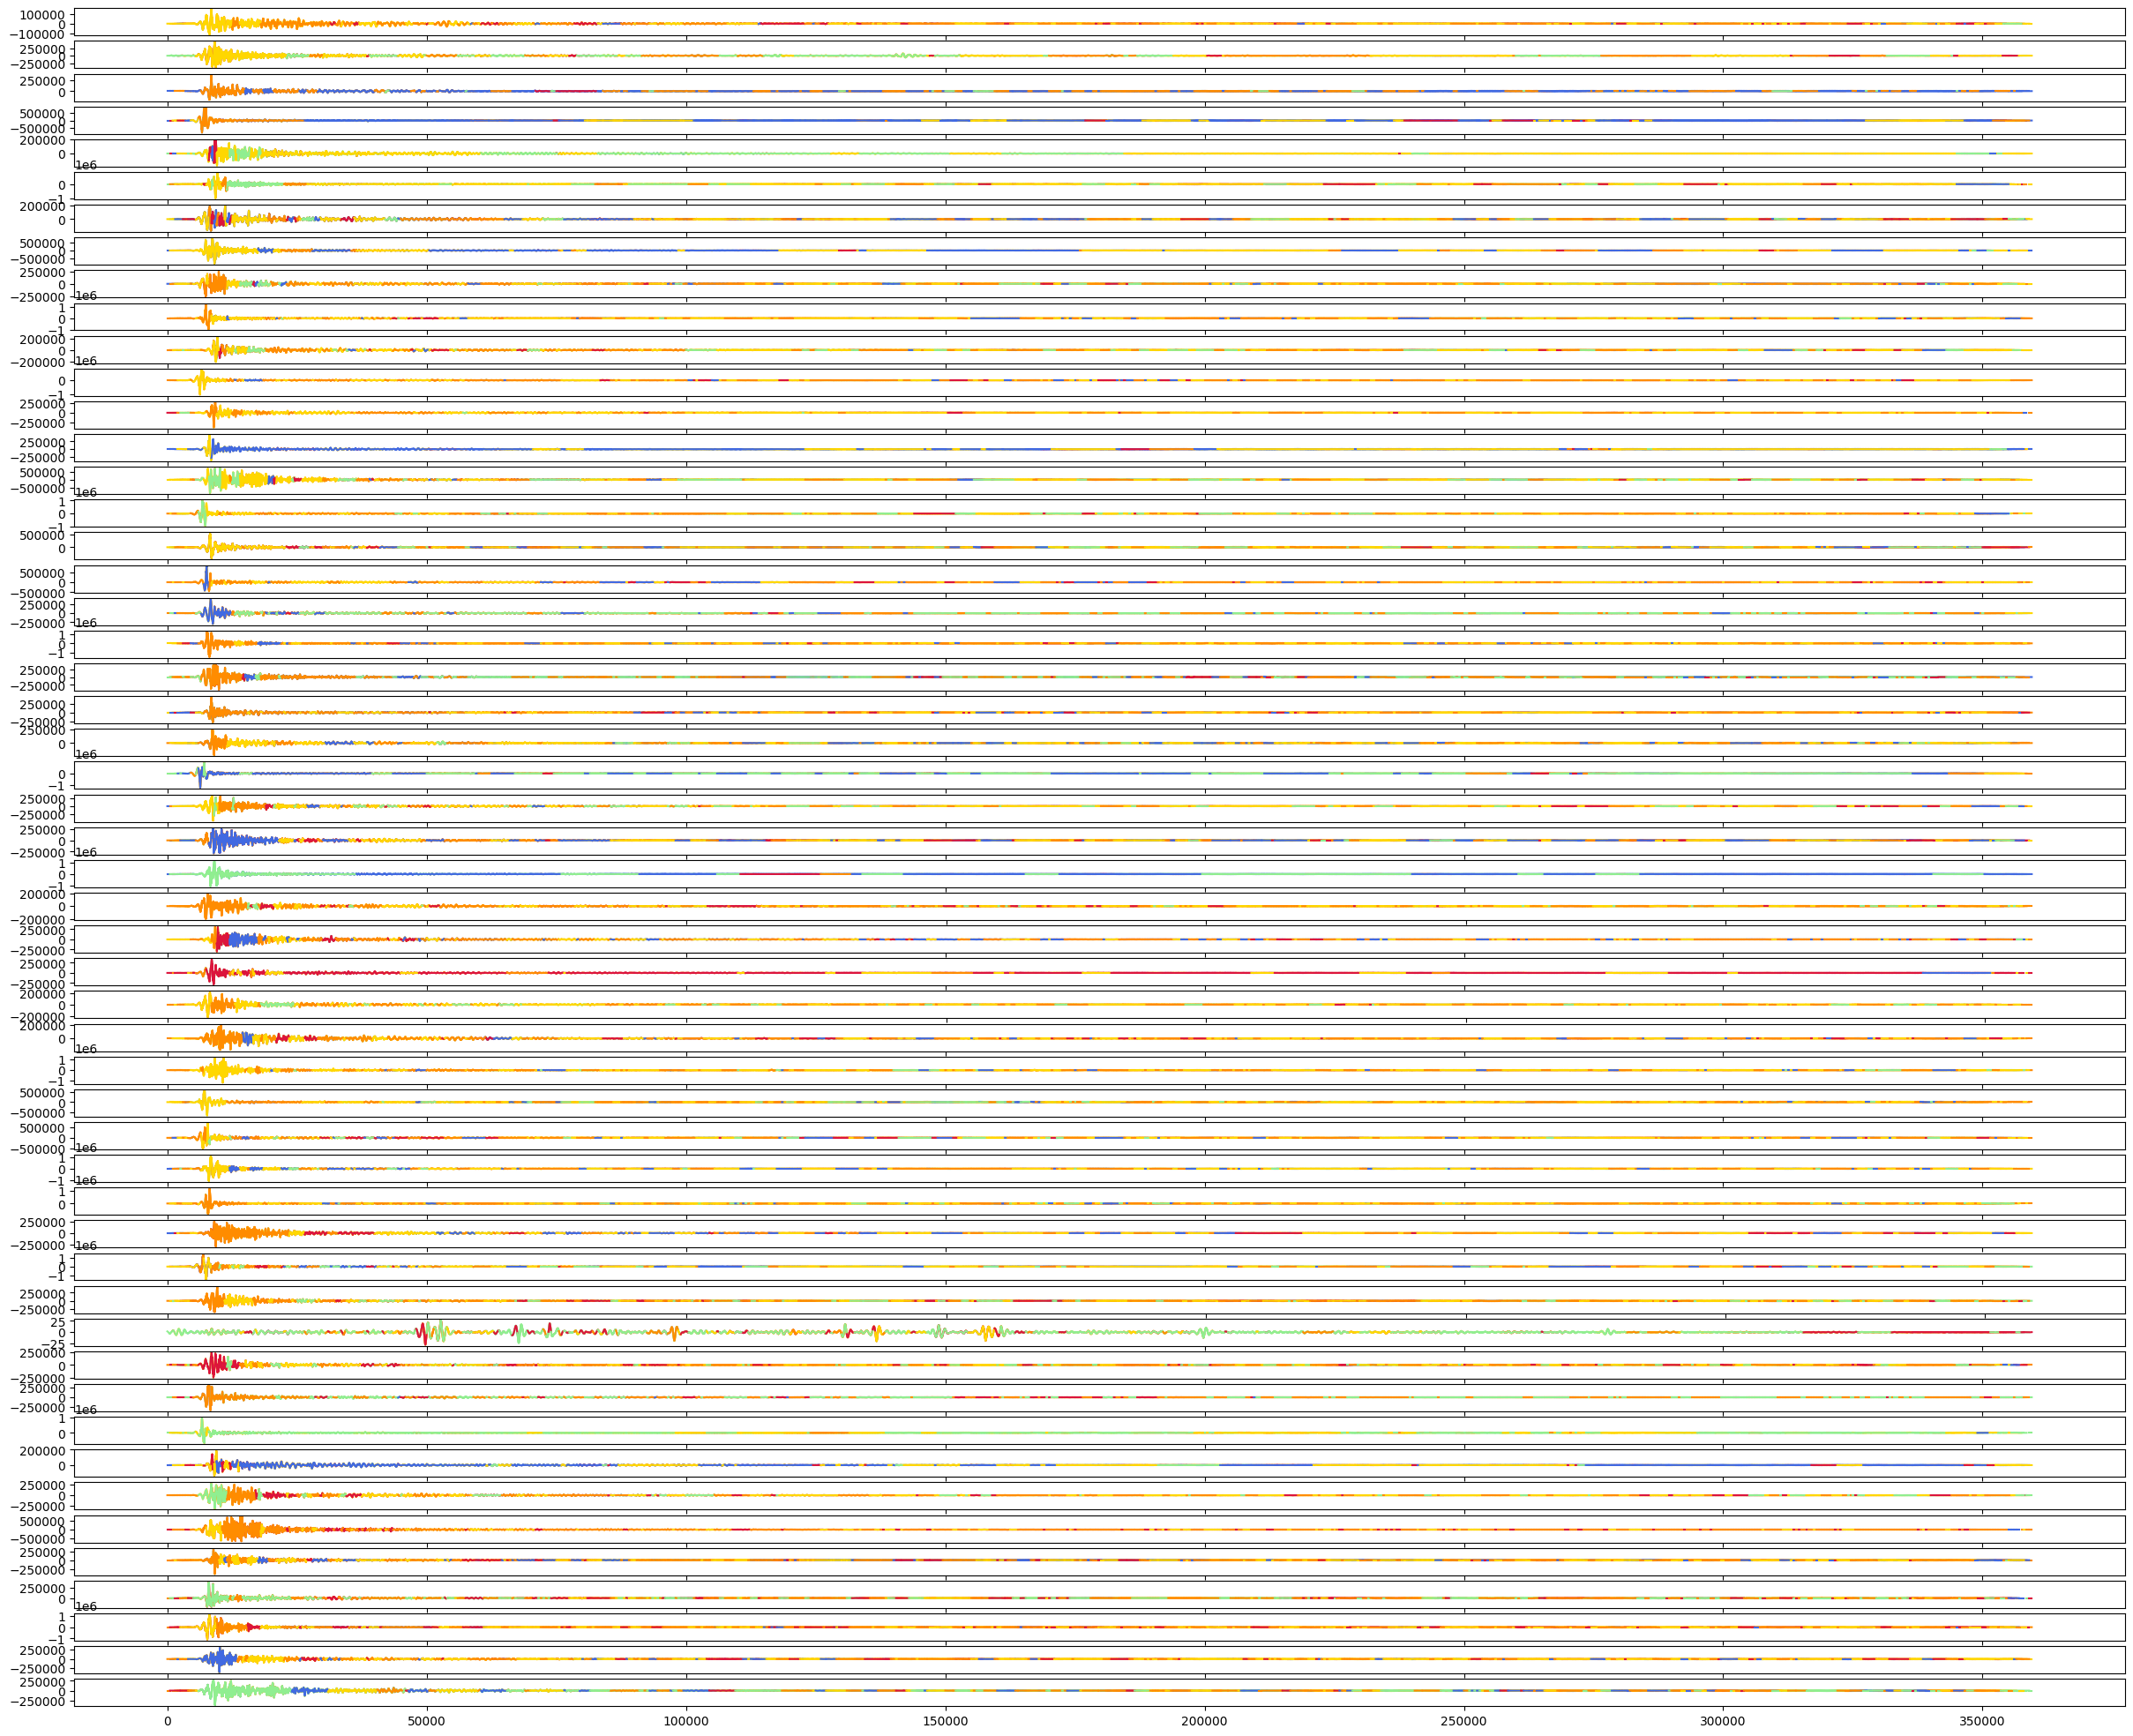

In [39]:
# 1 Choose the middle of the month to test the cluster model
finaldata = extract_data(749,750,"ev0001903830.h5")

# 2 make taper and apply to signal:
nt = len(finaldata[0])
dat_w=taper(nt,0,nt,clip_w,np.cos,np.zeros,np.concatenate,finaldata)


# 3 high pass filter
filtered_signal = filter(4, 1, 100, dat_w)

# 4.Use 5 seconds time window as cutoff for each station and first channel

datafiltered = datacutoff(finaldata)

indylist = []
int_lablist = []

for j in range(len(stations_list)):
    # divide the data into each station
    chunk_start = 720 * j
    chunk_end = 720 * (j + 1)
    h = datafiltered[chunk_start:chunk_end]

    # 5 Calculate the Fourier transform of the waveform
    datafft = myfourier(h)

    # 6 Get the intergral of squared waveform
    integral = iosw(h)

    # 7 Get Max spectral amplitude & Frequency of max spectral amplitude

    frequencies, max_amplitudes = freq(datafft)

    # 8 Get Center frequency:

    center_frequency = cenfreq(h,datafft)

    # 9 Signal bandwidth:

    signal_bandwidth = signalb(h,center_frequency,datafft)

    # 10 Zero up-crossing rate:
    zero_upcrossing_rate = zur(h,datafft)

    # 11 Rate of spectral peaks:
    rate_of_spectral_peaks = rosp(h,datafft)

    df = creatdf()

    # 12 PCA
    scaler = StandardScaler()
    finalX = scaler.fit_transform(df)
    pca = PCA(n_components=7)
    finalX_pca = pca.fit_transform(finalX)

    # 13 Whitening

    finalwpca = data_Whitening(finalX_pca)

    # 14 K-means

    km_full.fit(finalwpca)

    # Get the labels assigned to each data point using the best model
    labels = km_full.predict(finalwpca)

    # Count the number of data points in each cluster
    cluster_counts = [0] * num_clusters
    for label in labels:
        cluster_counts[label] += 1

    # Calculate the percentage of data points in each cluster
    total_points = len(finalwpca)
    cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

    # Print the cluster labels and their percentages
    for i in range(num_clusters):
        print("Label {}: {:.2f}%".format(i+1, cluster_percentages[i]))
    labels = labels.astype(int)

    # 15 Get the labels

    count,unique_labels = labelcount(labels)
    int_lab = labels.tolist()
    indy, interval = time_interval(labels)
    indylist.append(indy)
    int_lablist.append(int_lab)

# 16 Plot the results for each station

cols = ['royalblue','lightgreen','gold','crimson','darkorange']
%matplotlib inline
fig,ax=plt.subplots(len(stations_list),figsize=(30, 25))
for v in range(len(stations_list)):
    for i in range(len(indylist[v])-1):
        ax[v].plot(np.arange(indylist[v][i],indylist[v][i+1]),finaldata[v][indylist[v][i]:indylist[v][i+1]],cols[int_lablist[v][i]])


In [46]:
# 1 Choose the middle of the month to test the cluster model
finaldata = extract_data(738,750,"ev0001903830.h5")

# 2 make taper and apply to signal:
nt = len(finaldata[0])
dat_w=taper(nt,0,nt,clip_w,np.cos,np.zeros,np.concatenate,finaldata)


# 3 high pass filter
filtered_signal = filter(4, 1, 100, dat_w)

# 4.Use 5 seconds time window as cutoff for each station and first channel

datafiltered = datacutoff(finaldata)

indylist = []
int_lablist = []

for j in range(len(stations_list)):
    # divide the data into each station
    chunk_start = 720 * j
    chunk_end = 720 * (j + 1)
    h = datafiltered[chunk_start:chunk_end]

    # 5 Calculate the Fourier transform of the waveform
    datafft = myfourier(h)

    # 6 Get the intergral of squared waveform
    integral = iosw(h)

    # 7 Get Max spectral amplitude & Frequency of max spectral amplitude

    frequencies, max_amplitudes = freq(datafft)

    # 8 Get Center frequency:

    center_frequency = cenfreq(h,datafft)

    # 9 Signal bandwidth:

    signal_bandwidth = signalb(h,center_frequency,datafft)

    # 10 Zero up-crossing rate:
    zero_upcrossing_rate = zur(h,datafft)

    # 11 Rate of spectral peaks:
    rate_of_spectral_peaks = rosp(h,datafft)

    df = creatdf()

    # 12 PCA
    scaler = StandardScaler()
    finalX = scaler.fit_transform(df)
    pca = PCA(n_components=7)
    finalX_pca = pca.fit_transform(finalX)

    # 13 Whitening

    finalwpca = data_Whitening(finalX_pca)

    # 14 K-means

    km_full.fit(finalwpca)

    # Get the labels assigned to each data point using the best model
    labels = km_full.predict(finalwpca)

    # Count the number of data points in each cluster
    cluster_counts = [0] * num_clusters
    for label in labels:
        cluster_counts[label] += 1

    # Calculate the percentage of data points in each cluster
    total_points = len(finalwpca)
    cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

    # Print the cluster labels and their percentages
    for i in range(num_clusters):
        print("Label {}: {:.2f}%".format(i+1, cluster_percentages[i]))
    labels = labels.astype(int)

(720, 7)
xc.shape: (7, 720) 

Eigenvalues:
 [2.036  1.853  0.1658 0.894  1.0767 0.9744 0.    ] 

Eigenvectors:
 [[ 1.00000000e+00  1.29453990e-15 -6.46406964e-17 -2.49320643e-16
  -1.06736929e-16 -1.58036516e-16  4.02255425e-32]
 [ 0.00000000e+00  1.00000000e+00 -7.14965434e-17 -9.67175703e-17
  -5.14192116e-16  3.27915605e-16  7.08656287e-31]
 [ 0.00000000e+00  5.54208368e-16  2.51078055e-16  7.79249593e-16
   1.00000000e+00  7.51909536e-16  3.23053373e-30]
 [ 0.00000000e+00  6.59326745e-16 -3.10511473e-16  8.09085348e-16
   6.88857394e-16 -1.00000000e+00  1.06252777e-29]
 [ 0.00000000e+00  1.38274952e-16  2.19394786e-16  1.00000000e+00
   9.32175166e-16  1.75261920e-16  1.46136420e-30]
 [ 0.00000000e+00  1.42728253e-16  1.00000000e+00  2.65508869e-16
  -1.16219068e-16 -3.33527036e-16 -1.89521455e-29]
 [ 0.00000000e+00  6.91882415e-33 -3.99206285e-29  1.18778774e-29
   1.66330419e-29 -2.90316361e-29  1.00000000e+00]] 

Diagonal matrix for inverse square root of Eigenvalues:
 [[7.00800

In [47]:
# 1 Choose the middle of the month to test the cluster model
finaldata = extract_data(24,36,"ev0001903830.h5")

# 2 make taper and apply to signal:
nt = len(finaldata[0])
dat_w=taper(nt,0,nt,clip_w,np.cos,np.zeros,np.concatenate,finaldata)


# 3 high pass filter
filtered_signal = filter(4, 1, 100, dat_w)

# 4.Use 5 seconds time window as cutoff for each station and first channel

datafiltered = datacutoff(finaldata)

indylist = []
int_lablist = []

for j in range(len(stations_list)):
    # divide the data into each station
    chunk_start = 720 * j
    chunk_end = 720 * (j + 1)
    h = datafiltered[chunk_start:chunk_end]

    # 5 Calculate the Fourier transform of the waveform
    datafft = myfourier(h)

    # 6 Get the intergral of squared waveform
    integral = iosw(h)

    # 7 Get Max spectral amplitude & Frequency of max spectral amplitude

    frequencies, max_amplitudes = freq(datafft)

    # 8 Get Center frequency:

    center_frequency = cenfreq(h,datafft)

    # 9 Signal bandwidth:

    signal_bandwidth = signalb(h,center_frequency,datafft)

    # 10 Zero up-crossing rate:
    zero_upcrossing_rate = zur(h,datafft)

    # 11 Rate of spectral peaks:
    rate_of_spectral_peaks = rosp(h,datafft)

    df = creatdf()

    # 12 PCA
    scaler = StandardScaler()
    finalX = scaler.fit_transform(df)
    pca = PCA(n_components=7)
    finalX_pca = pca.fit_transform(finalX)

    # 13 Whitening

    finalwpca = data_Whitening(finalX_pca)

    # 14 K-means

    km_full.fit(finalwpca)

    # Get the labels assigned to each data point using the best model
    labels = km_full.predict(finalwpca)

    # Count the number of data points in each cluster
    cluster_counts = [0] * num_clusters
    for label in labels:
        cluster_counts[label] += 1

    # Calculate the percentage of data points in each cluster
    total_points = len(finalwpca)
    cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

    # Print the cluster labels and their percentages
    for i in range(num_clusters):
        print("Label {}: {:.2f}%".format(i+1, cluster_percentages[i]))
    labels = labels.astype(int)

(720, 7)
xc.shape: (7, 720) 

Eigenvalues:
 [2.0635 1.7706 0.2807 1.1233 0.9084 0.8534 0.    ] 

Eigenvectors:
 [[ 1.00000000e+00 -4.71809638e-16 -2.21430783e-17  1.31216582e-16
   1.79422816e-16  5.70900282e-17  6.46128863e-32]
 [ 0.00000000e+00 -1.00000000e+00 -2.65705203e-17 -1.17310170e-16
  -1.05206613e-16  1.31905012e-16  7.55710272e-30]
 [ 0.00000000e+00 -4.91876292e-16  3.77970254e-16  1.00000000e+00
  -1.24042020e-15 -4.06640848e-16 -1.20141233e-29]
 [ 0.00000000e+00  1.59113487e-16  2.70783865e-16 -7.02620837e-16
  -1.00000000e+00 -3.73282719e-15  6.33344514e-30]
 [ 0.00000000e+00 -2.99804655e-16  1.80424867e-16 -9.28247484e-16
   4.12232142e-15 -1.00000000e+00 -9.48940622e-30]
 [ 0.00000000e+00 -1.71610333e-16 -1.00000000e+00  2.21018001e-16
  -7.76627653e-17 -1.14258338e-16  3.84190957e-30]
 [ 0.00000000e+00 -8.90591523e-32  1.50272166e-29 -3.16340306e-30
   1.13543553e-29 -2.76763062e-29  1.00000000e+00]] 

Diagonal matrix for inverse square root of Eigenvalues:
 [[6.96100

In [48]:
# 1 Choose the middle of the month to test the cluster model
finaldata = extract_data(36,39,"ev0001903830.h5")

# 2 make taper and apply to signal:
nt = len(finaldata[0])
dat_w=taper(nt,0,nt,clip_w,np.cos,np.zeros,np.concatenate,finaldata)


# 3 high pass filter
filtered_signal = filter(4, 1, 100, dat_w)

# 4.Use 5 seconds time window as cutoff for each station and first channel

datafiltered = datacutoff(finaldata)

indylist = []
int_lablist = []

for j in range(len(stations_list)):
    # divide the data into each station
    chunk_start = 720 * j
    chunk_end = 720 * (j + 1)
    h = datafiltered[chunk_start:chunk_end]

    # 5 Calculate the Fourier transform of the waveform
    datafft = myfourier(h)

    # 6 Get the intergral of squared waveform
    integral = iosw(h)

    # 7 Get Max spectral amplitude & Frequency of max spectral amplitude

    frequencies, max_amplitudes = freq(datafft)

    # 8 Get Center frequency:

    center_frequency = cenfreq(h,datafft)

    # 9 Signal bandwidth:

    signal_bandwidth = signalb(h,center_frequency,datafft)

    # 10 Zero up-crossing rate:
    zero_upcrossing_rate = zur(h,datafft)

    # 11 Rate of spectral peaks:
    rate_of_spectral_peaks = rosp(h,datafft)

    df = creatdf()

    # 12 PCA
    scaler = StandardScaler()
    finalX = scaler.fit_transform(df)
    pca = PCA(n_components=7)
    finalX_pca = pca.fit_transform(finalX)

    # 13 Whitening

    finalwpca = data_Whitening(finalX_pca)

    # 14 K-means

    km_full.fit(finalwpca)

    # Get the labels assigned to each data point using the best model
    labels = km_full.predict(finalwpca)

    # Count the number of data points in each cluster
    cluster_counts = [0] * num_clusters
    for label in labels:
        cluster_counts[label] += 1

    # Calculate the percentage of data points in each cluster
    total_points = len(finalwpca)
    cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

    # Print the cluster labels and their percentages
    for i in range(num_clusters):
        print("Label {}: {:.2f}%".format(i+1, cluster_percentages[i]))
    labels = labels.astype(int)

(720, 7)
xc.shape: (7, 720) 

Eigenvalues:
 [2.0445 1.5298 0.54   1.0668 0.8726 0.9462 0.    ] 

Eigenvectors:
 [[ 1.00000000e+00  5.75213761e-17  1.47579485e-17 -5.55136826e-17
   6.52633063e-17  1.17934943e-17 -7.90435089e-33]
 [ 0.00000000e+00 -1.00000000e+00  1.28188202e-16  1.14538159e-15
  -4.22646984e-16  2.64898188e-16  1.10530004e-29]
 [ 0.00000000e+00  7.14342581e-16  2.06900423e-16  1.00000000e+00
  -4.54724216e-15  5.54196682e-16 -7.19941363e-30]
 [ 0.00000000e+00 -1.70017527e-16 -1.91345534e-16  1.12154764e-15
  -2.12797377e-15 -1.00000000e+00 -1.09428991e-28]
 [ 0.00000000e+00 -3.33426032e-17 -8.82579688e-16  4.43632540e-15
   1.00000000e+00 -2.28326292e-15  5.80985602e-30]
 [ 0.00000000e+00  4.23560204e-16  1.00000000e+00  9.15133084e-17
   3.46617397e-16  1.15163641e-16  5.91267410e-30]
 [ 0.00000000e+00  1.29044563e-30  1.42330456e-29  1.43113663e-29
  -2.74884943e-29  1.99080251e-28  1.00000000e+00]] 

Diagonal matrix for inverse square root of Eigenvalues:
 [[6.99400

In [49]:
# 1 Choose the middle of the month to test the cluster model
finaldata = extract_data(36,37,"ev0001903830.h5")

# 2 make taper and apply to signal:
nt = len(finaldata[0])
dat_w=taper(nt,0,nt,clip_w,np.cos,np.zeros,np.concatenate,finaldata)


# 3 high pass filter
filtered_signal = filter(4, 1, 100, dat_w)

# 4.Use 5 seconds time window as cutoff for each station and first channel

datafiltered = datacutoff(finaldata)

indylist = []
int_lablist = []

for j in range(len(stations_list)):
    # divide the data into each station
    chunk_start = 720 * j
    chunk_end = 720 * (j + 1)
    h = datafiltered[chunk_start:chunk_end]

    # 5 Calculate the Fourier transform of the waveform
    datafft = myfourier(h)

    # 6 Get the intergral of squared waveform
    integral = iosw(h)

    # 7 Get Max spectral amplitude & Frequency of max spectral amplitude

    frequencies, max_amplitudes = freq(datafft)

    # 8 Get Center frequency:

    center_frequency = cenfreq(h,datafft)

    # 9 Signal bandwidth:

    signal_bandwidth = signalb(h,center_frequency,datafft)

    # 10 Zero up-crossing rate:
    zero_upcrossing_rate = zur(h,datafft)

    # 11 Rate of spectral peaks:
    rate_of_spectral_peaks = rosp(h,datafft)

    df = creatdf()

    # 12 PCA
    scaler = StandardScaler()
    finalX = scaler.fit_transform(df)
    pca = PCA(n_components=7)
    finalX_pca = pca.fit_transform(finalX)

    # 13 Whitening

    finalwpca = data_Whitening(finalX_pca)

    # 14 K-means

    km_full.fit(finalwpca)

    # Get the labels assigned to each data point using the best model
    labels = km_full.predict(finalwpca)

    # Count the number of data points in each cluster
    cluster_counts = [0] * num_clusters
    for label in labels:
        cluster_counts[label] += 1

    # Calculate the percentage of data points in each cluster
    total_points = len(finalwpca)
    cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

    # Print the cluster labels and their percentages
    for i in range(num_clusters):
        print("Label {}: {:.2f}%".format(i+1, cluster_percentages[i]))
    labels = labels.astype(int)

(720, 7)
xc.shape: (7, 720) 

Eigenvalues:
 [2.0425 1.5025 0.5813 1.0744 0.8405 0.9587 0.    ] 

Eigenvectors:
 [[ 1.00000000e+00  3.28946378e-16  6.92264505e-17 -1.73282025e-16
   1.18014587e-16 -1.24846422e-17 -5.73958602e-32]
 [ 0.00000000e+00 -1.00000000e+00  6.07312819e-16  6.11583228e-17
  -1.01998370e-15 -1.62102453e-16 -5.35546310e-29]
 [ 0.00000000e+00  3.66879073e-16  5.74714844e-17  1.00000000e+00
   1.81401820e-16 -6.23480602e-16  9.08712913e-29]
 [ 0.00000000e+00 -6.26732296e-17 -8.62768129e-17  1.18064170e-15
   7.77127072e-16  1.00000000e+00 -1.71270590e-29]
 [ 0.00000000e+00 -1.35404607e-15 -6.86642097e-16  1.46992183e-15
   1.00000000e+00 -4.20145627e-16  5.44426514e-30]
 [ 0.00000000e+00 -5.04069384e-16 -1.00000000e+00 -7.88834521e-17
   4.60120780e-16  3.41692622e-17 -2.42011676e-29]
 [ 0.00000000e+00 -2.27484147e-31  1.14657565e-29  8.81899729e-30
  -3.49738659e-29 -4.02181566e-28  1.00000000e+00]] 

Diagonal matrix for inverse square root of Eigenvalues:
 [[6.99700

In [50]:
# 1 Choose the middle of the month to test the cluster model
finaldata = extract_data(726,750,"ev0001903830.h5")

# 2 make taper and apply to signal:
nt = len(finaldata[0])
dat_w=taper(nt,0,nt,clip_w,np.cos,np.zeros,np.concatenate,finaldata)


# 3 high pass filter
filtered_signal = filter(4, 1, 100, dat_w)

# 4.Use 5 seconds time window as cutoff for each station and first channel

datafiltered = datacutoff(finaldata)

indylist = []
int_lablist = []

for j in range(len(stations_list)):
    # divide the data into each station
    chunk_start = 720 * j
    chunk_end = 720 * (j + 1)
    h = datafiltered[chunk_start:chunk_end]

    # 5 Calculate the Fourier transform of the waveform
    datafft = myfourier(h)

    # 6 Get the intergral of squared waveform
    integral = iosw(h)

    # 7 Get Max spectral amplitude & Frequency of max spectral amplitude

    frequencies, max_amplitudes = freq(datafft)

    # 8 Get Center frequency:

    center_frequency = cenfreq(h,datafft)

    # 9 Signal bandwidth:

    signal_bandwidth = signalb(h,center_frequency,datafft)

    # 10 Zero up-crossing rate:
    zero_upcrossing_rate = zur(h,datafft)

    # 11 Rate of spectral peaks:
    rate_of_spectral_peaks = rosp(h,datafft)

    df = creatdf()

    # 12 PCA
    scaler = StandardScaler()
    finalX = scaler.fit_transform(df)
    pca = PCA(n_components=7)
    finalX_pca = pca.fit_transform(finalX)

    # 13 Whitening

    finalwpca = data_Whitening(finalX_pca)

    # 14 K-means

    km_full.fit(finalwpca)

    # Get the labels assigned to each data point using the best model
    labels = km_full.predict(finalwpca)

    # Count the number of data points in each cluster
    cluster_counts = [0] * num_clusters
    for label in labels:
        cluster_counts[label] += 1

    # Calculate the percentage of data points in each cluster
    total_points = len(finalwpca)
    cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

    # Print the cluster labels and their percentages
    for i in range(num_clusters):
        print("Label {}: {:.2f}%".format(i+1, cluster_percentages[i]))
    labels = labels.astype(int)

(720, 7)
xc.shape: (7, 720) 

Eigenvalues:
 [2.0118 1.8072 0.222  0.8736 1.0202 1.0652 0.    ] 

Eigenvectors:
 [[ 1.00000000e+00  2.31594930e-15 -1.15104665e-16 -2.51442835e-16
   1.76648586e-16 -1.06860770e-16  9.46263076e-33]
 [ 0.00000000e+00 -1.00000000e+00  1.54821818e-16 -5.30772301e-16
  -5.51796482e-16 -1.00087110e-15 -1.37124910e-30]
 [ 0.00000000e+00  9.98983136e-16 -6.60056455e-17 -2.58890787e-15
   1.98688150e-14 -1.00000000e+00  3.97772139e-30]
 [ 0.00000000e+00  7.01364638e-16  2.40318704e-16  3.35336775e-15
  -1.00000000e+00 -1.78225605e-14  3.38245119e-30]
 [ 0.00000000e+00 -2.40780540e-16 -3.27788489e-16 -1.00000000e+00
  -2.85508390e-15  1.41723773e-15  1.11679914e-30]
 [ 0.00000000e+00 -1.41673739e-16 -1.00000000e+00  5.80534831e-16
  -7.75895325e-16  2.79647479e-16 -1.48281926e-30]
 [ 0.00000000e+00  1.18031591e-33 -6.96846932e-31  5.50574088e-31
   1.98125904e-30  2.34626038e-30  1.00000000e+00]] 

Diagonal matrix for inverse square root of Eigenvalues:
 [[7.05000

In [ ]:
# 1 Choose the middle of the month to test the cluster model
finaldata = extract_data(12,36,"ev0001903830.h5")

# 2 make taper and apply to signal:
nt = len(finaldata[0])
dat_w=taper(nt,0,nt,clip_w,np.cos,np.zeros,np.concatenate,finaldata)


# 3 high pass filter
filtered_signal = filter(4, 1, 100, dat_w)

# 4.Use 5 seconds time window as cutoff for each station and first channel

datafiltered = datacutoff(finaldata)

indylist = []
int_lablist = []

for j in range(len(stations_list)):
    # divide the data into each station
    chunk_start = 720 * j
    chunk_end = 720 * (j + 1)
    h = datafiltered[chunk_start:chunk_end]

    # 5 Calculate the Fourier transform of the waveform
    datafft = myfourier(h)

    # 6 Get the intergral of squared waveform
    integral = iosw(h)

    # 7 Get Max spectral amplitude & Frequency of max spectral amplitude

    frequencies, max_amplitudes = freq(datafft)

    # 8 Get Center frequency:

    center_frequency = cenfreq(h,datafft)

    # 9 Signal bandwidth:

    signal_bandwidth = signalb(h,center_frequency,datafft)

    # 10 Zero up-crossing rate:
    zero_upcrossing_rate = zur(h,datafft)

    # 11 Rate of spectral peaks:
    rate_of_spectral_peaks = rosp(h,datafft)

    df = creatdf()

    # 12 PCA
    scaler = StandardScaler()
    finalX = scaler.fit_transform(df)
    pca = PCA(n_components=7)
    finalX_pca = pca.fit_transform(finalX)

    # 13 Whitening

    finalwpca = data_Whitening(finalX_pca)

    # 14 K-means

    km_full.fit(finalwpca)

    # Get the labels assigned to each data point using the best model
    labels = km_full.predict(finalwpca)

    # Count the number of data points in each cluster
    cluster_counts = [0] * num_clusters
    for label in labels:
        cluster_counts[label] += 1

    # Calculate the percentage of data points in each cluster
    total_points = len(finalwpca)
    cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

    # Print the cluster labels and their percentages
    for i in range(num_clusters):
        print("Label {}: {:.2f}%".format(i+1, cluster_percentages[i]))
    labels = labels.astype(int)

In [ ]:
%matplotlib inline
cols = ['royalblue','lightgreen','gold','crimson','darkorange']

fig,ax=plt.subplots(len(stations_list),figsize=(30, 25))
for v in range(len(stations_list)):
    for i in range(len(indylist[v])-1):
        ax[v].plot(np.arange(indylist[v][i],indylist[v][i+1]),finaldata[v][indylist[v][i]:indylist[v][i+1]],cols[int_lablist[v][i]])

In [ ]:
%matplotlib notebook
cols = ['royalblue','lightgreen','gold','crimson','darkorange']
fig,ax=plt.subplots(len(stations_list),figsize=(30, 25))
for v in range(len(stations_list)):
    for i in range(len(indylist[v])-1):
        ax[v].plot(np.arange(indylist[v][i],indylist[v][i+1]),finaldata[v][indylist[v][i]:indylist[v][i+1]],cols[int_lablist[v][i]])

In [ ]:
%matplotlib notebook
cols = ['royalblue','lightgreen','gold','crimson','darkorange']

In [ ]:
finaldata = extract_data(749,750,"ev0001903830.h5")

In [ ]:
%matplotlib notebook
for i in range(len(indylist[16])-1):
    plot(np.arange(indylist[16][i],indylist[16][i+1]),finaldata[16][indylist[16][i]:indylist[16][i+1]],cols[int_lablist[16][i]])

In [ ]:
%matplotlib notebook
for i in range(len(indylist[22])-1):
    plot(np.arange(indylist[22][i],indylist[22][i+1]),finaldata[22][indylist[22][i]:indylist[22][i+1]],cols[int_lablist[22][i]])

In [ ]:
%matplotlib notebook
for i in range(len(indylist[49])-1):
    plot(np.arange(indylist[49][i],indylist[49][i+1]),finaldata[49][indylist[49][i]:indylist[49][i+1]],cols[int_lablist[49][i]])

<IPython.core.display.Javascript object>


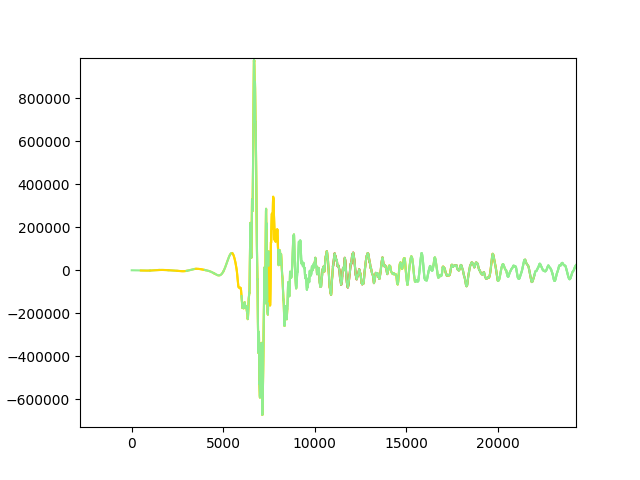

In [40]:
%matplotlib notebook
for i in range(len(indylist[43])-1):
    plot(np.arange(indylist[43][i],indylist[43][i+1]),finaldata[43][indylist[43][i]:indylist[43][i+1]],cols[int_lablist[43][i]])

<IPython.core.display.Javascript object>


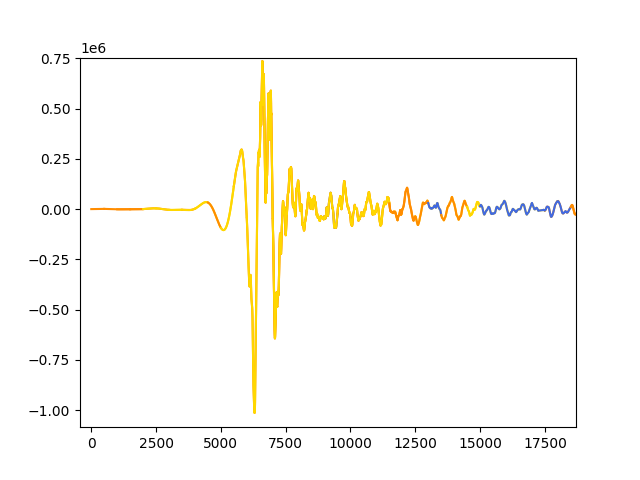

In [42]:
%matplotlib notebook
for i in range(len(indylist[11])-1):
    plot(np.arange(indylist[11][i],indylist[11][i+1]),finaldata[11][indylist[11][i]:indylist[11][i+1]],cols[int_lablist[11][i]])


<IPython.core.display.Javascript object>


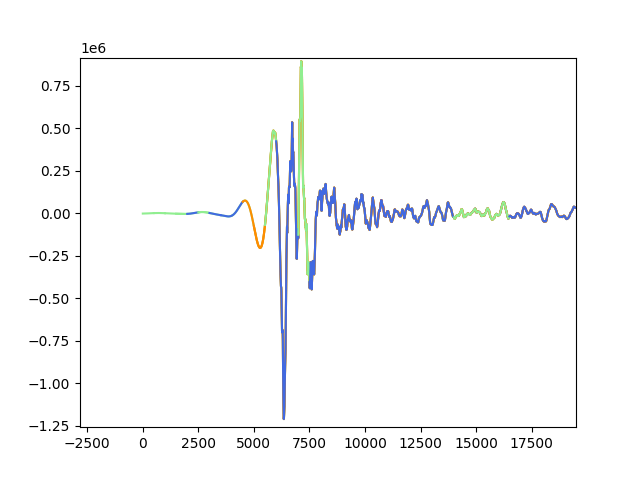

In [43]:

for i in range(len(indylist[23])-1):
    plot(np.arange(indylist[23][i],indylist[23][i+1]),finaldata[23][indylist[23][i]:indylist[23][i+1]],cols[int_lablist[23][i]])


<IPython.core.display.Javascript object>


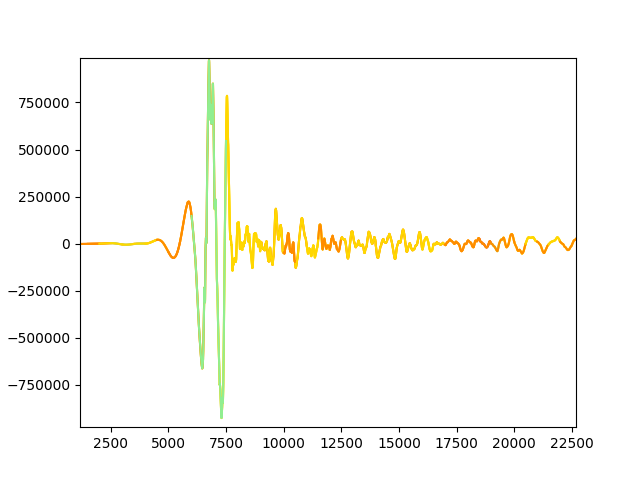

In [44]:
%matplotlib notebook
for i in range(len(indylist[15])-1):
    plot(np.arange(indylist[15][i],indylist[15][i+1]),finaldata[15][indylist[15][i]:indylist[15][i+1]],cols[int_lablist[15][i]])

<IPython.core.display.Javascript object>


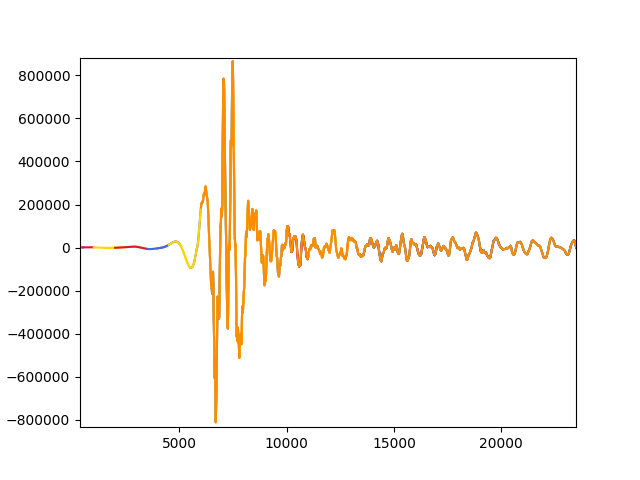

In [45]:
%matplotlib notebook
for i in range(len(indylist[3])-1):
    plot(np.arange(indylist[3][i],indylist[3][i+1]),finaldata[3][indylist[3][i]:indylist[3][i+1]],cols[int_lablist[3][i]])